<a href="https://colab.research.google.com/github/Madusalves/Rede_Neural_Implementando_Imagens/blob/main/Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Implementando uma deep learning com uso de imagens

import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [18]:
transform = transforms.ToTensor()  # Definindo a conversao de imagem pra tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte do treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform ) # Carrega parte da validação
valloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes


 MNIST é um grande banco de dados de dígitos manuscritos, comumente usado para treinar vários sistemas de processamento de imagens.

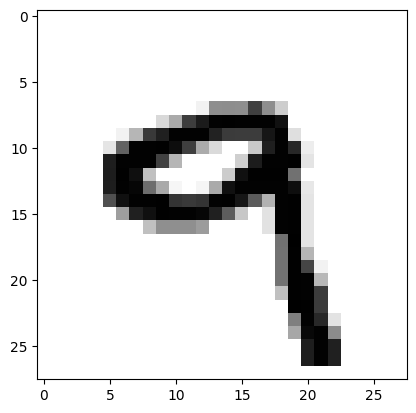

In [19]:
dataiter = iter(trainloader) # Cria um iterador para treinar o tensor
imagens, etiquetas = next(dataiter) # Armazena duas variaveis para a imagem
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r') # Dropa a imagem

In [20]:
print(imagens[0].shape) # verifica as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # verifica as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [21]:
class Modelo(nn.Module):  # Classe modelo para criar o esqueleto
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) # camada de entrada, 784 neuronios que se liagam a 128
        self.linear2 = nn.Linear(128, 64) # camada interna 1, 128 neuroniosque se ligam a 64
        self.linear3 = nn.Linear(64, 10) # camada interna 2, 64 neuronios que se ligam a 10
        # para a camadade saida nao é necessario definir nada pois so precisamos pegar o output da camada interna 2

    def forward(self, x):
        x = F.relu(self.linear1(x)) # função de ativação da camada de entrada para a camada interna 1
        x = F.relu(self.linear2(x)) # função de ativação da camada interna 1 para a cmada interna 2
        x = self.liner3(x) # função de ativação da camada interna 2 para camada de saida, nesse caso f(x) = x
        return F.log_softmax(x, dim=1) # dados utilizados para calcular a perda

In [22]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # define a politica de atualização dos pesos e das bias
  inicio = time() # timer para sabermos quanto tempo levou

  criterio = nn.NLLLoss() # definindo o criterio para calcular a perda
  EPOCHS = 10 # numero de epocas que o algoritimo rodará
  modelo.train() # ativando o modo de treinamento do modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # inicializando a perda acumulada da epoch em questao

    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1) # convertendo imagens para vetores de 28*28
      otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # colocando os dados do modelo
      perda_instantanea = criterio(output, etiquetas.to(device)) # calculando a perda da epoch em questao

      perda_instantanea.backward() # back propagation a partir da perda

      otimizador.step() # atualizando os pesos e as bias

      perda_acumulada += perda_instantanea.item() # atualização da perda acumulada

    else:
      print('Epoch {} - Perda resultante: {}'.format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos) = ", (time()-inicio)/60)

In [23]:
def validacao(modelo,valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      #desativa  autograd para acelerar a validaçao. grafos computacionais dinamicos tem um custo alto de processamento
      with torch.no_grad():
        logps = modelo(img.to(device)) # outpu do modelo em escala logaritma

        ps = torch.exp(logps) # converte output para escala normal
        probab = list(ps.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab)) # converte o tensor em um numero
        etiqueta_certa = etiquetas.numpy()[i]
        if(etiqueta_certa == etiqueta_pred):
          conta_corretas += 1
        conta_todas
    print('Total de imagens testadas = ', conta_todas)
    print('\nPrecisão do modelo = {}%'.format(conta_corretas*100/conta_todas))

In [24]:
modelo = Modulo()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelo.to(device)

" modelo = Module()\ndevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\nmodelo.to(device) "